In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

dataFrame_1 = pd.read_csv("DailyDelhiClimateTrain.csv")

In [2]:
dataFrame_1.describe

<bound method NDFrame.describe of             date   meantemp    humidity  wind_speed  meanpressure
0     01-01-2013  10.000000   84.500000    0.000000   1015.666667
1     02-01-2013   7.400000   92.000000    2.980000   1017.800000
2     03-01-2013   7.166667   87.000000    4.633333   1018.666667
3     04-01-2013   8.666667   71.333333    1.233333   1017.166667
4     05-01-2013   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  28-12-2016  17.217391   68.043478    3.547826   1015.565217
1458  29-12-2016  15.238095   87.857143    6.000000   1016.904762
1459  30-12-2016  14.095238   89.666667    6.266667   1017.904762
1460  31-12-2016  15.052632   87.000000    7.325000   1016.100000
1461  01-01-2017  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]>

In [3]:
dataFrame_2 = dataFrame_1.rename(
              columns={"date": "Date", "meantemp": "Temperature", 
                       "humidity": "Humidity",
                       "wind_speed": "Wind Speed","meanpressure": "Pressure"}
               )

In [4]:
dataFrame_2.describe

<bound method NDFrame.describe of             Date  Temperature    Humidity  Wind Speed     Pressure
0     01-01-2013    10.000000   84.500000    0.000000  1015.666667
1     02-01-2013     7.400000   92.000000    2.980000  1017.800000
2     03-01-2013     7.166667   87.000000    4.633333  1018.666667
3     04-01-2013     8.666667   71.333333    1.233333  1017.166667
4     05-01-2013     6.000000   86.833333    3.700000  1016.500000
...          ...          ...         ...         ...          ...
1457  28-12-2016    17.217391   68.043478    3.547826  1015.565217
1458  29-12-2016    15.238095   87.857143    6.000000  1016.904762
1459  30-12-2016    14.095238   89.666667    6.266667  1017.904762
1460  31-12-2016    15.052632   87.000000    7.325000  1016.100000
1461  01-01-2017    10.000000  100.000000    0.000000  1016.000000

[1462 rows x 5 columns]>

In [5]:
dataFrame_2=dataFrame_2.dropna()
dataFrame_2=dataFrame_2.drop_duplicates()
# dataFrame_2.to_csv("DailyDelhiClimateTrain_2.csv", index=False)

In [6]:
# dataFrame_2=pd.read_csv("DailyDelhiClimateTrain_2.csv")

In [7]:
cols=dataFrame_2.columns
for k in range(1,len(cols)):
  firstQuartile=dataFrame_2[cols[k]].quantile(.25)
  thirdQuartile=dataFrame_2[cols[k]].quantile(.75)
  IQR=thirdQuartile-firstQuartile
  temp=dataFrame_2[(dataFrame_2[cols[k]]<firstQuartile-1.5*IQR) | (dataFrame_2[cols[k]]>thirdQuartile+1.5*IQR)]
  dataFrame_2[cols[k]]=dataFrame_2[cols[k]].drop(temp.index)

In [8]:
dataFrame_3=dataFrame_2.dropna()
dataFrame_3.describe

<bound method NDFrame.describe of             Date  Temperature    Humidity  Wind Speed     Pressure
0     01-01-2013    10.000000   84.500000    0.000000  1015.666667
1     02-01-2013     7.400000   92.000000    2.980000  1017.800000
2     03-01-2013     7.166667   87.000000    4.633333  1018.666667
3     04-01-2013     8.666667   71.333333    1.233333  1017.166667
4     05-01-2013     6.000000   86.833333    3.700000  1016.500000
...          ...          ...         ...         ...          ...
1457  28-12-2016    17.217391   68.043478    3.547826  1015.565217
1458  29-12-2016    15.238095   87.857143    6.000000  1016.904762
1459  30-12-2016    14.095238   89.666667    6.266667  1017.904762
1460  31-12-2016    15.052632   87.000000    7.325000  1016.100000
1461  01-01-2017    10.000000  100.000000    0.000000  1016.000000

[1421 rows x 5 columns]>

In [9]:
# dataFrame_3.to_csv("DailyDelhiClimateTrain_3.csv", index=False)

In [10]:
# dataFrame_3=pd.read_csv("DailyDelhiClimateTrain_3.csv")

In [11]:
# Take the temp from 2nd day to last day in dataset into variable PredTemp
num = 4
PredTemp = dataFrame_3["Temperature"][num:]
PredHumidity = dataFrame_3["Humidity"][num:]
PredPressure = dataFrame_3["Pressure"][num:]
PredWindSpeed = dataFrame_3["Wind Speed"][num:]
rows = PredTemp.shape[0]
# Check how many rows are there
rows

1417

In [12]:
# Add new columns for prediction variables are adding tupples to them
dataFrame_3["Prediction_Temperature"] = PredTemp
dataFrame_3["Prediction_Humidity"] = PredHumidity
dataFrame_3["Prediction_Pressure"] = PredPressure
dataFrame_3["Prediction_Wind Speed"]=PredWindSpeed

In [13]:
# add the PredTemp to new column (eg: Prediction_Temp) in dataset
dataFrame_3["Prediction_Temperature"][0:rows] = PredTemp
dataFrame_3["Prediction_Humidity"][0:rows] = PredHumidity
dataFrame_3["Prediction_Pressure"][0:rows] = PredPressure
dataFrame_3["Prediction_Wind Speed"][0:rows]=PredWindSpeed
dataFrame_3

,Date,Temperature,Humidity,Wind Speed,Pressure,Prediction_Temperature,Prediction_Humidity,Prediction_Pressure,Prediction_Wind Speed
0,01-01-2013,10.000000,84.500000,0.000000,1015.666667,6.000000,86.833333,1016.500000,3.700000
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000,7.000000,82.800000,1018.000000,1.480000
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667,7.000000,78.600000,1020.000000,6.300000
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667,8.857143,63.714286,1018.714286,7.142857
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000,14.000000,51.250000,1017.000000,12.500000
...,...,...,...,...,...,...,...,...,...
1457,28-12-2016,17.217391,68.043478,3.547826,1015.565217,10.000000,100.000000,1016.000000,0.000000
1458,29-12-2016,15.238095,87.857143,6.000000,1016.904762,15.238095,87.857143,1016.904762,6.000000
1459,30-12-2016,14.095238,89.666667,6.266667,1017.904762,14.095238,89.666667,1017.904762,6.266667
1460,31-12-2016,15.052632,87.000000,7.325000,1016.100000,15.052632,87.000000,1016.100000,7.325000


In [15]:
dataFrame_3.drop(dataFrame_3.tail(num).index, inplace=True)
dataFrame_3

,Date,Temperature,Humidity,Wind Speed,Pressure,Prediction_Temperature,Prediction_Humidity,Prediction_Pressure,Prediction_Wind Speed
0,01-01-2013,10.000000,84.500000,0.000000,1015.666667,6.000000,86.833333,1016.500000,3.700000
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000,7.000000,82.800000,1018.000000,1.480000
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667,7.000000,78.600000,1020.000000,6.300000
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667,8.857143,63.714286,1018.714286,7.142857
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000,14.000000,51.250000,1017.000000,12.500000
...,...,...,...,...,...,...,...,...,...
1452,23-12-2016,15.550000,74.700000,1.205000,1014.250000,16.850000,67.550000,1017.200000,8.335000
1453,24-12-2016,17.318182,78.636364,5.236364,1011.318182,17.217391,68.043478,1015.565217,3.547826
1454,25-12-2016,14.000000,94.300000,9.085000,1014.350000,15.238095,87.857143,1016.904762,6.000000
1455,26-12-2016,17.142857,74.857143,8.784211,1016.952381,14.095238,89.666667,1017.904762,6.266667


In [16]:
dataFrame_4=dataFrame_3.dropna()

In [17]:
# dataFrame_4.to_csv("DailyDelhiClimateTrain_4.csv", index=False)

In [18]:
# dataFrame_4=pd.read_csv("DailyDelhiClimateTrain_4.csv")

In [19]:
dataFrame_4

,Date,Temperature,Humidity,Wind Speed,Pressure,Prediction_Temperature,Prediction_Humidity,Prediction_Pressure,Prediction_Wind Speed
0,01-01-2013,10.000000,84.500000,0.000000,1015.666667,6.000000,86.833333,1016.500000,3.700000
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000,7.000000,82.800000,1018.000000,1.480000
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667,7.000000,78.600000,1020.000000,6.300000
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667,8.857143,63.714286,1018.714286,7.142857
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000,14.000000,51.250000,1017.000000,12.500000
...,...,...,...,...,...,...,...,...,...
1452,23-12-2016,15.550000,74.700000,1.205000,1014.250000,16.850000,67.550000,1017.200000,8.335000
1453,24-12-2016,17.318182,78.636364,5.236364,1011.318182,17.217391,68.043478,1015.565217,3.547826
1454,25-12-2016,14.000000,94.300000,9.085000,1014.350000,15.238095,87.857143,1016.904762,6.000000
1455,26-12-2016,17.142857,74.857143,8.784211,1016.952381,14.095238,89.666667,1017.904762,6.266667


In [102]:
# model = LinearRegression()
# model

LinearRegression()

In [103]:
# x = dataFrame_4[["Temperature"]]
# y = dataFrame_4[["Prediction_Temperature"]]
# # print(x, y)

In [104]:
# model.fit(x,y)

LinearRegression()

In [105]:
# print("Intercept = ", model.intercept_, "\nCoef = ", model.coef_)

Intercept =  [0.69720268] 
Coef =  [[0.97273164]]


In [106]:
# actualTempPred = model.predict(dataFrame_4[["Temperature"]])
# actualTempPred

array([[10.42451909],
       [ 7.89541682],
       [ 7.6684461 ],
       ...,
       [17.44510397],
       [15.51978007],
       [14.40808677]])

In [107]:
# model.score(dataFrame_4[["Prediction_Temperature"]], model.predict(dataFrame_4[["Temperature"]]))

0.9471765037410373

In [108]:
# dataFrame_4["ActualTempPred"] = actualTempPred
# dataFrame_4

,Date,Temperature,Humidity,Wind Speed,Pressure,Prediction_Temperature,Prediction_Humidity,Prediction_Pressure,Prediction_Wind Speed,ActualTempPred
0,01-01-2013,10.000000,84.500000,0.000000,1015.666667,7.400000,92.000000,1017.800000,2.980000,10.424519
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000,7.166667,87.000000,1018.666667,4.633333,7.895417
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667,8.666667,71.333333,1017.166667,1.233333,7.668446
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667,6.000000,86.833333,1016.500000,3.700000,9.127544
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000,7.000000,82.800000,1018.000000,1.480000,6.533593
...,...,...,...,...,...,...,...,...,...,...
1414,26-12-2016,17.142857,74.857143,8.784211,1016.952381,16.850000,67.550000,1017.200000,8.335000,17.372602
1415,27-12-2016,16.850000,67.550000,8.335000,1017.200000,17.217391,68.043478,1015.565217,3.547826,17.087731
1416,28-12-2016,17.217391,68.043478,3.547826,1015.565217,15.238095,87.857143,1016.904762,6.000000,17.445104
1417,29-12-2016,15.238095,87.857143,6.000000,1016.904762,14.095238,89.666667,1017.904762,6.266667,15.519780


# MAKE NEW

In [109]:
# variable_X = ["Temperature", "Humidity", "Wind Speed", "Pressure"]
# dataFrame_4[variable_X[0]]

In [24]:
model = LinearRegression()
# model
variable_X = ["Temperature", "Humidity", "Wind Speed", "Pressure"]
variable_Y = ["Prediction_Temperature", "Prediction_Humidity", "Prediction_Wind Speed", "Prediction_Pressure"]
loopNum = 0
# print(len(variable_X))

while(loopNum < len(variable_X)):
    x = dataFrame_4[[variable_X[loopNum]]]
    y = dataFrame_4[[variable_Y[loopNum]]]
    # print("Getting-> ", variable_X[loopNum],"\n", x, "\n","Getting-> ", variable_X[loopNum],"\n", y)
    
    model.fit(x,y)
    # print("\n",variable_X[loopNum])
    # print("Intercept = ", model.intercept_, "\nCoef = ", model.coef_)
    # print("Score = ", model.score(y, model.predict(x)))

    actualTempPred = model.predict(x)
    # print(actualTempPred)

    dataFrame_4["ActualPred_" + variable_X[loopNum]] = actualTempPred
    # print(dataFrame_4)
    # dataFrame_4["ABCDEFG" + variable_X[loopNum]] = 999999
    # print(dataFrame_4)


    loopNum+=1

# print("\n\nHello\n")

dataFrame_4.to_csv("ActualVarPredition.csv",index=False)

# model.fit(x,y)

# print("Intercept = ", model.intercept_, "\nCoef = ", model.coef_)
# print("Score = ", model.score(dataFrame_4[["Prediction_Temperature"]], model.predict(dataFrame_4[["Temperature"]])))

# actualTempPred = model.predict(dataFrame_4[["Temperature"]])
# # actualTempPred


# dataFrame_4["ActualTempPred"] = actualTempPred
# dataFrame_4



In [149]:
# def Lr_Model(x_train, x_test, y_train, y_test):
#     T_Model = LinearRegression()
#     # variablePredictions = T_Model.predict(dataFrame_4["Temperature"])
#     # print("\n\n\t", variablePredictions, "\nDone\n")
#     return T_Model.fit(x_train, y_train), T_Model.intercept_, T_Model.coef_, T_Model.score(y_test, T_Model.predict(x_test))

In [150]:
# def PrintAll(arr):
#     for i in range(0,4):
#         print(arrVariables[loopNum] + Model_Attributes[i], "-> ", arr[i])

In [151]:
# # Model_Attributes = ["Model", "Predict", "Model_Intercept", "Model_Coefficient", "_r_sq"]
# Model_Attributes = ["Model", "Model_Intercept", "Model_Coefficient", "_r_sq"]
# Model_Length = len(Model_Attributes)

In [152]:
# #Create a variable for attribute name
# # Attribute_Name = input(print("Enter the Attribute Name :"))

# # Loop through all variable 
# arrVariables = ["Temperature", "Humidity", "Wind Speed", "Pressure"]
# loopNum = 0
# while(loopNum < 4):
#     arr = ""
#     # for i in range(0,Model_Length):
#     #     arr = (arr + ", " + arrVariables[loopNum] + Model_Attributes[i])
#     # print(arr)
#     print("\n")
#     x_train, x_test, y_train, y_test = train_test_split(dataFrame_4[[arrVariables[loopNum]]], dataFrame_4[["Prediction_" + arrVariables[loopNum]]], test_size=0.3)
#     arr = Lr_Model(x_train, x_test, y_train, y_test)
#     PrintAll(arr)
    
#     # df.to_csv("LR_Pred_New_Data.csv",index=False)
    
    
#     # print("\n")
    
#     loopNum+=1




TemperatureModel ->  LinearRegression()
TemperatureModel_Intercept ->  [1.64852335]
TemperatureModel_Coefficient ->  [[0.93342878]]
Temperature_r_sq ->  0.8776719997487482


HumidityModel ->  LinearRegression()
HumidityModel_Intercept ->  [19.10868559]
HumidityModel_Coefficient ->  [[0.68491542]]
Humidity_r_sq ->  0.3486850584123946


Wind SpeedModel ->  LinearRegression()
Wind SpeedModel_Intercept ->  [4.86471207]
Wind SpeedModel_Coefficient ->  [[0.2527414]]
Wind Speed_r_sq ->  -0.5221647198625385


PressureModel ->  LinearRegression()
PressureModel_Intercept ->  [91.00093725]
PressureModel_Coefficient ->  [[0.9097148]]
Pressure_r_sq ->  0.837049225767841


In [153]:
# while(loopNum < 4):
#     x_train, x_test, y_train, y_test = train_test_split(dataFrame_4[[Attribute_Name]], dataFrame_4[["Prediction_" + Attribute_Name]], test_size=0.3)
#     arr = Lr_Model(x_train, x_test, y_train, y_test)
#     PrintAll(arr)


In [154]:
# x_train, x_test, y_train, y_test = train_test_split(dataFrame_4[[Attribute_Name]], dataFrame_4[["Prediction_" + Attribute_Name]], test_size=0.3)

In [155]:
# arr = Lr_Model(x_train, x_test, y_train, y_test)
# PrintAll(arr)

### LR Completed

In [25]:
dataFrame_5 = pd.read_csv("ActualVarPredition.csv")
dataFrame_5

,Date,Temperature,Humidity,Wind Speed,Pressure,Prediction_Temperature,Prediction_Humidity,Prediction_Pressure,Prediction_Wind Speed,ActualPred_Temperature,ActualPred_Humidity,ActualPred_Wind Speed,ActualPred_Pressure
0,01-01-2013,10.000000,84.500000,0.000000,1015.666667,6.000000,86.833333,1016.500000,3.700000,11.104700,77.109865,4.893047,1015.074926
1,02-01-2013,7.400000,92.000000,2.980000,1017.800000,7.000000,82.800000,1018.000000,1.480000,8.687131,82.259686,5.619899,1017.037815
2,03-01-2013,7.166667,87.000000,4.633333,1018.666667,7.000000,78.600000,1020.000000,6.300000,8.470169,78.826472,6.023164,1017.835238
3,04-01-2013,8.666667,71.333333,1.233333,1017.166667,8.857143,63.714286,1018.714286,7.142857,9.864921,68.069068,5.193870,1016.455082
4,05-01-2013,6.000000,86.833333,3.700000,1016.500000,14.000000,51.250000,1017.000000,12.500000,7.385363,78.712031,5.795515,1015.841679
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,23-12-2016,15.550000,74.700000,1.205000,1014.250000,16.850000,67.550000,1017.200000,8.335000,16.265281,70.380766,5.186959,1013.771445
1412,24-12-2016,17.318182,78.636364,5.236364,1011.318182,17.217391,68.043478,1015.565217,3.547826,17.909397,73.083641,6.170249,1011.073867
1413,25-12-2016,14.000000,94.300000,9.085000,1014.350000,15.238095,87.857143,1016.904762,6.000000,14.824038,83.838964,7.108971,1013.863455
1414,26-12-2016,17.142857,74.857143,8.784211,1016.952381,14.095238,89.666667,1017.904762,6.266667,17.746374,70.488667,7.035605,1016.257917


In [26]:
dataFrame_5=dataFrame_5.iloc[:,9:]
dataFrame_5

,ActualPred_Temperature,ActualPred_Humidity,ActualPred_Wind Speed,ActualPred_Pressure
0,11.104700,77.109865,4.893047,1015.074926
1,8.687131,82.259686,5.619899,1017.037815
2,8.470169,78.826472,6.023164,1017.835238
3,9.864921,68.069068,5.193870,1016.455082
4,7.385363,78.712031,5.795515,1015.841679
...,...,...,...,...
1411,16.265281,70.380766,5.186959,1013.771445
1412,17.909397,73.083641,6.170249,1011.073867
1413,14.824038,83.838964,7.108971,1013.863455
1414,17.746374,70.488667,7.035605,1016.257917


In [27]:
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0)
     kmeans.fit(dataFrame_5)
     wcss.append(kmeans.inertia_)

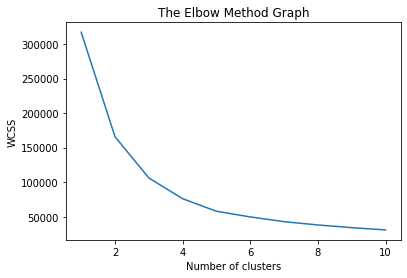

In [28]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
dataFrame_5.shape[0]

1416

In [30]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10 )

y_kmeans = kmeans.fit_predict(dataFrame_5)

# for i in range(0,1421):
#     print(y_kmeans[i])
for i in range(0,dataFrame_5.shape[0]):
    if(y_kmeans[i]==0):
        dataFrame_5.loc[i, 'outlook'] = "Partly cloud"
    if(y_kmeans[i]==1):
        dataFrame_5.loc[i, 'outlook'] = "Cold"
    if(y_kmeans[i]==2):
        dataFrame_5.loc[i, 'outlook'] = "Clear"
    if(y_kmeans[i]==3):
        dataFrame_5.loc[i, 'outlook'] = "Cloudy"
dataFrame_5

,ActualPred_Temperature,ActualPred_Humidity,ActualPred_Wind Speed,ActualPred_Pressure,outlook
0,11.104700,77.109865,4.893047,1015.074926,Partly cloud
1,8.687131,82.259686,5.619899,1017.037815,Partly cloud
2,8.470169,78.826472,6.023164,1017.835238,Partly cloud
3,9.864921,68.069068,5.193870,1016.455082,Partly cloud
4,7.385363,78.712031,5.795515,1015.841679,Partly cloud
...,...,...,...,...,...
1411,16.265281,70.380766,5.186959,1013.771445,Partly cloud
1412,17.909397,73.083641,6.170249,1011.073867,Partly cloud
1413,14.824038,83.838964,7.108971,1013.863455,Partly cloud
1414,17.746374,70.488667,7.035605,1016.257917,Partly cloud


In [31]:
# dataFrame_5["outlook"].unique()

In [32]:
kmeans.cluster_centers_

array([[  16.2573879 ,   71.33884226,    5.97187395, 1016.05385636],
       [  32.29482238,   45.06282386,    7.10907176, 1002.88572149],
       [  29.99249887,   68.08671294,    6.48037113, 1001.27511738],
       [  24.27277667,   58.62123841,    6.37895167, 1011.63806481]])

In [33]:
dataFrame_5.shape

(1416, 5)

In [34]:
x=dataFrame_5.drop('outlook', axis=1)
y=dataFrame_5['outlook']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [36]:
svclassifier = SVC(kernel='linear', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='linear')

In [37]:
y_pred = svclassifier.predict(X_test)
y_pred

array(['Cloudy', 'Cloudy', 'Clear', 'Clear', 'Cold', 'Cold', 'Clear',
       'Cold', 'Cold', 'Partly cloud', 'Cold', 'Partly cloud', 'Clear',
       'Partly cloud', 'Cold', 'Cold', 'Cloudy', 'Clear', 'Cold', 'Cold',
       'Cold', 'Cloudy', 'Cloudy', 'Clear', 'Cloudy', 'Clear', 'Cold',
       'Clear', 'Clear', 'Clear', 'Cloudy', 'Partly cloud', 'Cloudy',
       'Partly cloud', 'Clear', 'Cold', 'Cloudy', 'Cloudy', 'Cloudy',
       'Cloudy', 'Cloudy', 'Partly cloud', 'Cold', 'Cold', 'Cloudy',
       'Cold', 'Partly cloud', 'Cloudy', 'Partly cloud', 'Cloudy',
       'Cloudy', 'Partly cloud', 'Cold', 'Clear', 'Clear', 'Clear',
       'Clear', 'Cold', 'Cloudy', 'Cold', 'Cold', 'Clear', 'Partly cloud',
       'Cloudy', 'Partly cloud', 'Cold', 'Cloudy', 'Cold', 'Clear',
       'Cold', 'Clear', 'Partly cloud', 'Clear', 'Cloudy', 'Partly cloud',
       'Cloudy', 'Clear', 'Cloudy', 'Clear', 'Clear', 'Cold', 'Cloudy',
       'Clear', 'Cold', 'Cold', 'Partly cloud', 'Cold', 'Clear',
       'Partly

In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[73  0  0  0]
 [ 0 82  1  0]
 [ 0  0 68  0]
 [ 0  0  0 60]]
              precision    recall  f1-score   support

       Clear       1.00      1.00      1.00        73
      Cloudy       1.00      0.99      0.99        83
        Cold       0.99      1.00      0.99        68
Partly cloud       1.00      1.00      1.00        60

    accuracy                           1.00       284
   macro avg       1.00      1.00      1.00       284
weighted avg       1.00      1.00      1.00       284



In [39]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[70  3  0  0]
 [ 1 80  0  2]
 [ 0  3 65  0]
 [ 0  3  0 57]]
              precision    recall  f1-score   support

       Clear       0.99      0.96      0.97        73
      Cloudy       0.90      0.96      0.93        83
        Cold       1.00      0.96      0.98        68
Partly cloud       0.97      0.95      0.96        60

    accuracy                           0.96       284
   macro avg       0.96      0.96      0.96       284
weighted avg       0.96      0.96      0.96       284



In [40]:
dataFrame_5.to_csv("DailyDelhiClimateTrain_5.csv",index=False)